In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import ( accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

In [51]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
df.isnull().sum().sum()

np.int64(0)

In [54]:
df.duplicated().sum()

np.int64(1081)

In [55]:
df = df.drop_duplicates()

In [56]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# EDA

In [57]:
class_counts = df['Class'].value_counts()
class_percent = df['Class'].value_counts(normalize=True) * 100

print("Counts:\n", class_counts)
print("\nPercentages (%):\n", class_percent)

Counts:
 Class
0    283253
1       473
Name: count, dtype: int64

Percentages (%):
 Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


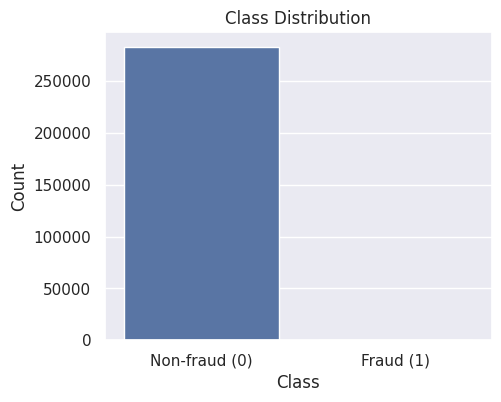

In [58]:
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0,1], ['Non-fraud (0)', 'Fraud (1)'])
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()

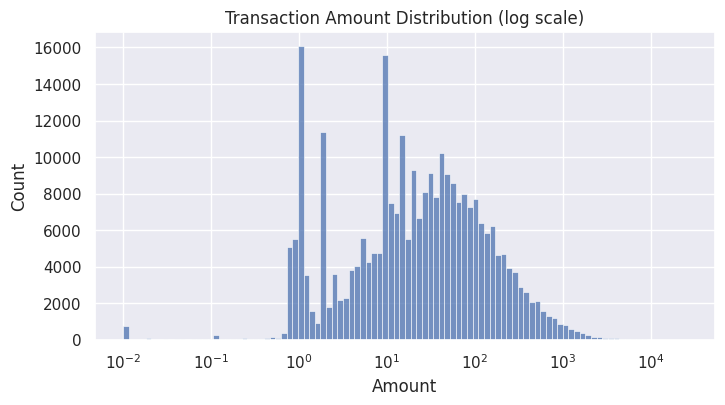

In [59]:
plt.figure(figsize=(8,4))
sns.histplot(df["Amount"], bins=100, log_scale=True)
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Amount")
plt.show()

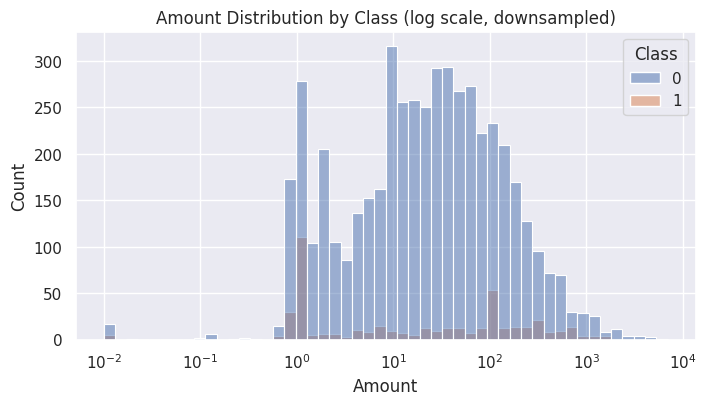

In [60]:
non_fraud_sample = df[df['Class'] == 0].sample(5000, random_state=42)
fraud = df[df['Class'] == 1]

viz_df = pd.concat([non_fraud_sample, fraud])

plt.figure(figsize=(8,4))
sns.histplot(data=viz_df, x="Amount", hue="Class", bins=50, log_scale=True, kde=False)
plt.title("Amount Distribution by Class (log scale, downsampled)")
plt.show()

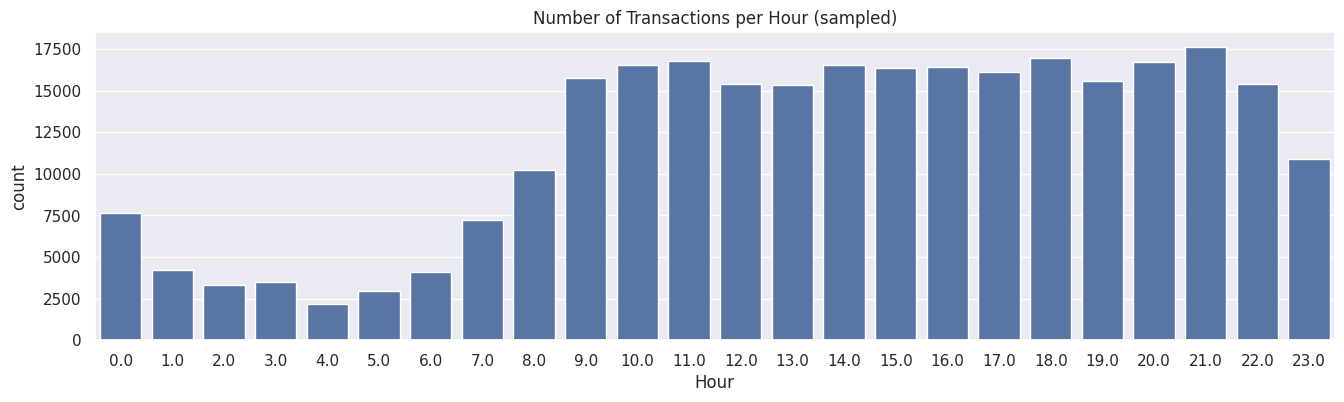

In [61]:
df['Hour'] = (df['Time'] // 3600) % 24

plt.figure(figsize=(16,4))
sns.countplot(x='Hour', data=df)
plt.title("Number of Transactions per Hour (sampled)")
plt.show()

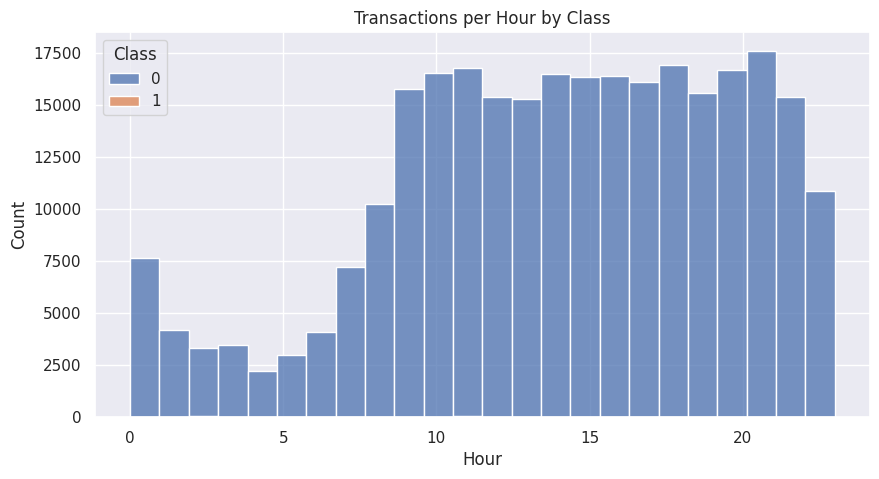

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Hour', hue='Class', multiple='stack', bins=24)
plt.title("Transactions per Hour by Class")
plt.show()

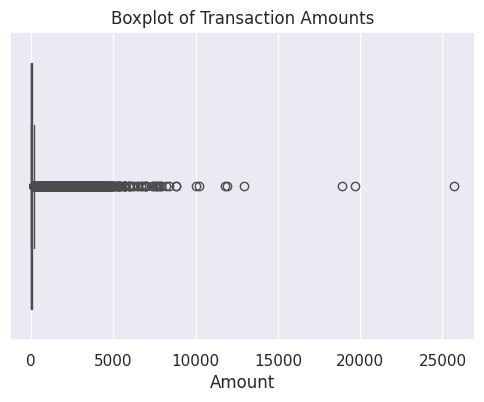

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

In [64]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print("Outlier count:", len(outliers))

Lower bound: -102.26500000000001
Upper bound: 185.375
Outlier count: 31685


# Feature engineering

In [65]:
df['log_Amount'] = np.log1p(df['Amount'])

In [66]:
def part_of_day(h):
    if 5 <= h < 12:
        return "morning"
    elif 12 <= h < 18:
        return "afternoon"
    elif 18 <= h < 23:
        return "evening"
    else:
        return "night"

df['Part_of_Day'] = df['Hour'].apply(part_of_day)

In [67]:
df['Part_of_Day'] = df['Part_of_Day'].map({
    'morning': 0,
    'afternoon': 1,
    'evening': 2,
    'night': 3
})

# Train–test split, SMOTE, scaling

In [68]:
df_clean = df.drop(columns=['Time', 'Amount'])

X = df_clean.drop(columns=['Class'])
y = df_clean['Class']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [70]:
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64

Test class distribution:
Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [72]:
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_balanced))

Before SMOTE: [226602    378]
After SMOTE: [226602 226602]


In [73]:
columns_to_scale = ['log_Amount', 'Hour', 'Part_of_Day']

scaler = StandardScaler()
X_train_balanced[columns_to_scale] = scaler.fit_transform(X_train_balanced[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Train models

## Logistic Regression:

In [74]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight=None,
    max_iter=1000
)

log_reg.fit(X_train_balanced, y_train_balanced)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

In [75]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



## Random Forest:

In [76]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_balanced, y_train_balanced)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [77]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.91      0.77      0.83        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



## XGBoost:

In [78]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train_balanced, y_train_balanced)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

In [79]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.61      0.81      0.70        95

    accuracy                           1.00     56746
   macro avg       0.81      0.90      0.85     56746
weighted avg       1.00      1.00      1.00     56746



# Models evaluation

In [80]:
def evaluate_model(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba),
        "PR-AUC": average_precision_score(y_true, y_proba)
    }

## Comparison table

In [81]:
results = []

results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf))
results.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb))

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1,ROC-AUC,PR-AUC
0,Logistic Regression,0.973778,0.053239,0.873684,0.100363,0.958700,0.684854
1,Random Forest,0.999489,0.912500,0.768421,0.834286,0.968687,0.820501
2,XGBoost,0.998819,0.611111,0.810526,0.696833,0.977987,0.808337


## Confusion matrices

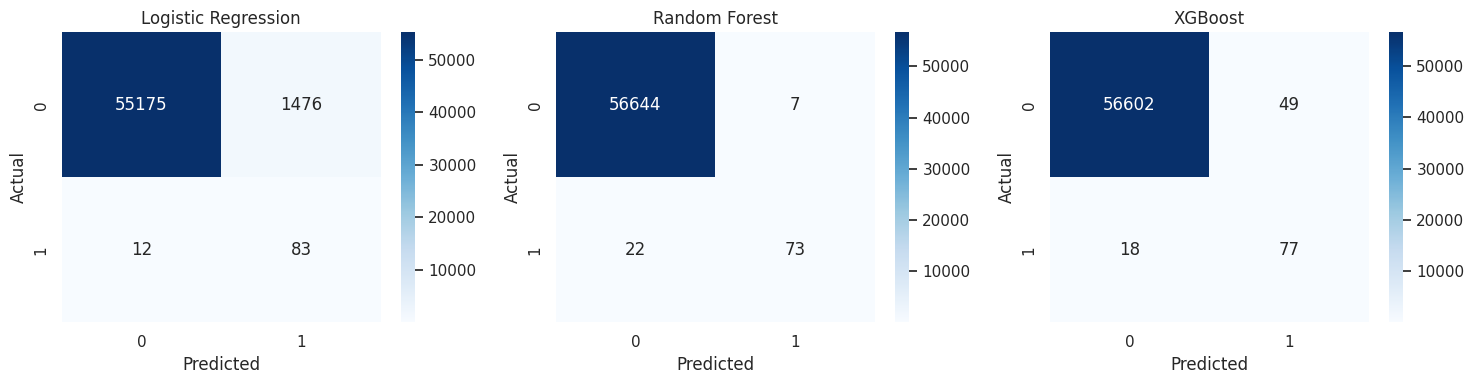

In [83]:
plt.figure(figsize=(15,4))

# Logistic Regression
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# XGBoost
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Threshold tuning for XGBoost

In [85]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba_xgb)

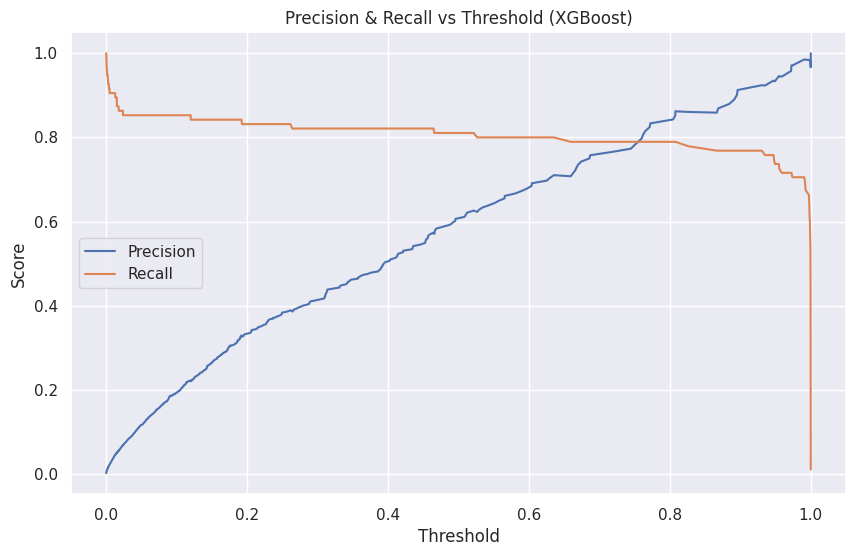

In [86]:
plt.figure(figsize=(10,6))

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")

plt.title("Precision & Recall vs Threshold (XGBoost)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

best_threshold

np.float32(0.9306512)

In [89]:
y_pred_tuned = (y_proba_xgb >= best_threshold).astype(int)

Best Threshold: 0.9307

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.92      0.77      0.84        95

    accuracy                           1.00     56746
   macro avg       0.96      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



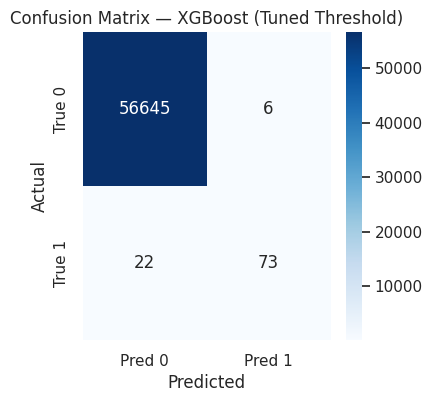

In [90]:
print(f"Best Threshold: {best_threshold:.4f}\n")
print(classification_report(y_test, y_pred_tuned))

cm = confusion_matrix(y_test, y_pred_tuned)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix — XGBoost (Tuned Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Final comparison table

In [98]:
Final_results = []

Final_results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr))
Final_results.append(evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf))
Final_results.append(evaluate_model("XGBoost", y_test, y_pred_xgb, y_proba_xgb))
Final_results.append(evaluate_model("XGBoost (Tuned Threshold)", y_test, y_pred_tuned, y_proba_xgb))

Final_results = pd.DataFrame(Final_results)
Final_results.set_index("Model").T


Model,Logistic Regression,Random Forest,XGBoost,XGBoost (Tuned Threshold)
Accuracy,0.973778,0.999489,0.998819,0.999507
Precision,0.053239,0.912500,0.611111,0.924051
Recall,0.873684,0.768421,0.810526,0.768421
F1,0.100363,0.834286,0.696833,0.839080
ROC-AUC,0.958700,0.968687,0.977987,0.977987
PR-AUC,0.684854,0.820501,0.808337,0.808337
